In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
business_attr = pd.read_csv('/content/drive/MyDrive/CS267_Project_Dataset/yelp_business_attributes.csv')
business_attr = business_attr[(['business_id','RestaurantsPriceRange2','Alcohol', 'HasTV', 'Music_dj', 'Ambience_romantic','Ambience_intimate','Ambience_classy','RestaurantsGoodForGroups','WiFi','OutdoorSeating','DogsAllowed','DietaryRestrictions_vegetarian'])]
business_attr.head(5)


,business_id,RestaurantsPriceRange2,Alcohol,HasTV,Music_dj,Ambience_romantic,Ambience_intimate,Ambience_classy,RestaurantsGoodForGroups,WiFi,OutdoorSeating,DogsAllowed,DietaryRestrictions_vegetarian
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [ ]:
business = pd.read_csv('/content/drive/MyDrive/CS267_Project_Dataset/yelp_business.csv')
business.head(5)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [ ]:
restaurant = business[(business['categories'].str.contains('Restaurant.*')==True) & (business['is_open'] == 1)]
restaurant.head(1)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [ ]:
rest_init = restaurant[(['business_id','name','city', 'stars', 'review_count'])]
rest_init.head(1)

,business_id,name,city,stars,review_count
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,3.5,116


In [ ]:
rest_full = pd.merge(rest_init, business_attr, on='business_id')
rest_full.head(1)

,business_id,name,city,stars,review_count,RestaurantsPriceRange2,Alcohol,HasTV,Music_dj,Ambience_romantic,Ambience_intimate,Ambience_classy,RestaurantsGoodForGroups,WiFi,OutdoorSeating,DogsAllowed,DietaryRestrictions_vegetarian
0,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,3.5,116,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na


In [ ]:
#rest_full_1 = rest_full[(rest_full['BusinessAcceptsCreditCards'] != 'Na')]
# rest_ed = rest_full[(['business_id','name','city', 'stars', 'review_count', 'BusinessParking_street','DietaryRestrictions_vegan','DietaryRestrictions_vegetarian'])]
# rest_ed.head(1)
rest_ed=rest_full


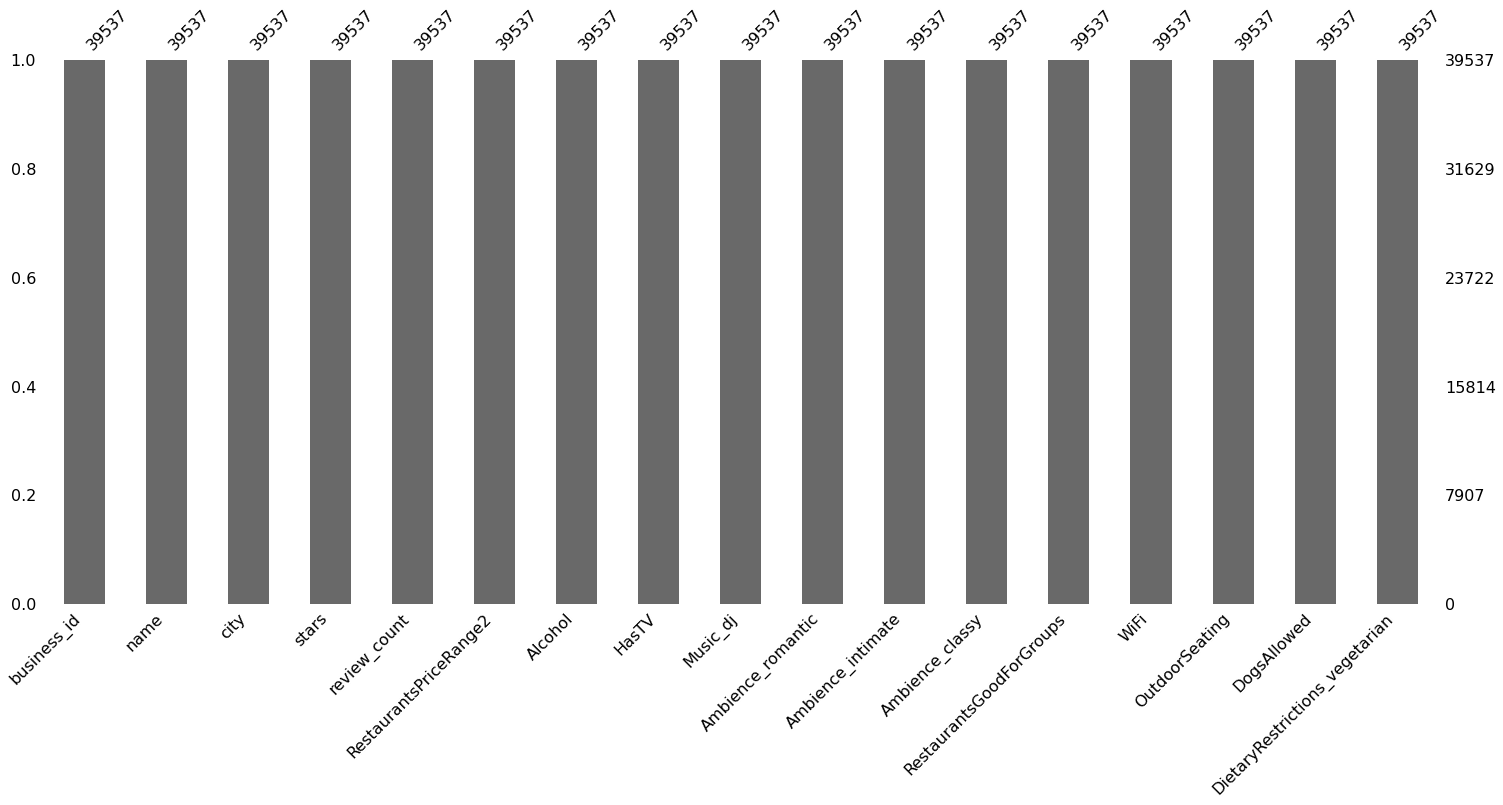

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

#rest_ed['BusinessParking_street'].unique()
#rest_ed['DietaryRestrictions_vegetarian'].unique()


mno.bar(rest_ed)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# by using the OrginalEncoder function provided by the sklearn package.
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
rest_ed["city"] = ord_enc.fit_transform(rest_ed[["city"]])
rest_ed["RestaurantsPriceRange2"] = ord_enc.fit_transform(rest_ed[["RestaurantsPriceRange2"]])
rest_ed["Alcohol"] = ord_enc.fit_transform(rest_ed[["Alcohol"]])
rest_ed["HasTV"] = ord_enc.fit_transform(rest_ed[["HasTV"]])
rest_ed["Music_dj"] = ord_enc.fit_transform(rest_ed[["Music_dj"]])
rest_ed["Ambience_romantic"] = ord_enc.fit_transform(rest_ed[["Ambience_romantic"]])
rest_ed["Ambience_intimate"] = ord_enc.fit_transform(rest_ed[["Ambience_intimate"]])
rest_ed["Ambience_classy"] = ord_enc.fit_transform(rest_ed[["Ambience_classy"]])
rest_ed["RestaurantsGoodForGroups"] = ord_enc.fit_transform(rest_ed[["RestaurantsGoodForGroups"]])
rest_ed["OutdoorSeating"] = ord_enc.fit_transform(rest_ed[["OutdoorSeating"]])
rest_ed["DogsAllowed"] = ord_enc.fit_transform(rest_ed[["DogsAllowed"]])
rest_ed["DietaryRestrictions_vegetarian"] = ord_enc.fit_transform(rest_ed[["DietaryRestrictions_vegetarian"]])
rest_ed["WiFi"] = ord_enc.fit_transform(rest_ed[["WiFi"]])
rest_ed.loc[rest_ed["stars"] == 1, "review"] = 'bad'
rest_ed.loc[rest_ed["stars"] == 1.5, "review"] = 'bad'
rest_ed.loc[rest_ed["stars"] == 2.5, "review"] = 'ok'
rest_ed.loc[rest_ed["stars"] == 2, "review"] = 'ok'
rest_ed.loc[rest_ed["stars"] == 3, "review"] = 'good'
rest_ed.loc[rest_ed["stars"] == 3.5, "review"] = 'good'
rest_ed.loc[rest_ed["stars"] == 4, "review"] = 'great'
rest_ed.loc[rest_ed["stars"] == 4.5, "review"] = 'excellent'
rest_ed.loc[rest_ed["stars"] == 5, "review"] = 'best'
# clf.fit(X_train, y_train)
X = rest_ed[['city', 'RestaurantsPriceRange2','Alcohol', 'HasTV', 'Music_dj', 'Ambience_romantic','Ambience_intimate','Ambience_classy','RestaurantsGoodForGroups','WiFi','OutdoorSeating','DogsAllowed','DietaryRestrictions_vegetarian']]
Y = rest_ed['review']
rest_ed.head(30)

,business_id,name,city,stars,review_count,RestaurantsPriceRange2,Alcohol,HasTV,Music_dj,Ambience_romantic,Ambience_intimate,Ambience_classy,RestaurantsGoodForGroups,WiFi,OutdoorSeating,DogsAllowed,DietaryRestrictions_vegetarian,review
0,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",129.0,3.5,116,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,good
1,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",647.0,4.0,5,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,great
2,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",95.0,3.5,7,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,good
3,Gu-xs3NIQTj3Mj2xYoN2aw,"""Maxim Bakery & Restaurant""",521.0,3.5,34,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,good
4,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",667.0,3.5,39,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,good
5,Dj0S-Oe4ytRJzMGUPgYUkw,"""Panera Bread""",167.0,2.0,4,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ok
6,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",667.0,5.0,3,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,best
7,FXHfcFVEfI1vVngW2gVOpw,"""Bampot House of Tea & Board Games""",667.0,4.0,55,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,great
8,tRVx2c89coruPRwYhGTcTw,"""Yuzu""",294.0,3.5,78,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,good
9,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",486.0,1.0,10,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,bad


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.40819423368740515

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.10      0.02      0.03       318
        best       0.17      0.01      0.02       311
   excellent       0.19      0.02      0.03      1526
        good       0.42      0.87      0.57      4882
       great       0.29      0.07      0.12      3041
          ok       0.41      0.18      0.25      1784

    accuracy                           0.41     11862
   macro avg       0.26      0.20      0.17     11862
weighted avg       0.34      0.41      0.31     11862



In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[   5    2    6  211    9   85]
 [   1    4    7  257   26   16]
 [   4    2   29 1327  135   29]
 [  18    5   62 4261  294  242]
 [   4    5   30 2689  228   85]
 [  18    5   18 1342   86  315]]


In [ ]:
labels = ['bad', 'ok', 'good', 'great','excellent', 'best']
labels.sort()

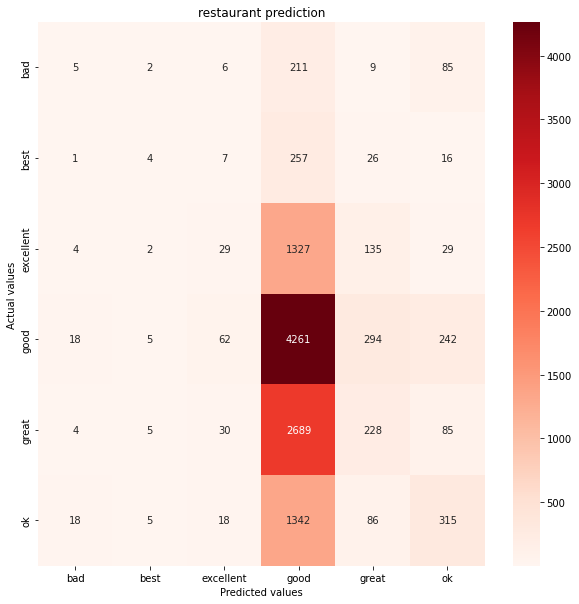

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt ='.0f', xticklabels=labels, yticklabels=labels)
ax.set_title('restaurant prediction');
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values');